In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def get_mean_std(dfs, field, length):
    arr = np.array(
            [dfs[i][field][:length] for i in range(len(dfs))])
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)
    
    return mean, std

In [2]:
# get the data logs as DFs

df_gp_1 = pd.read_csv("run-data/gp/1/log.csv")
df_gp_2 = pd.read_csv("run-data/gp/2/log.csv")
df_gp_3 = pd.read_csv("run-data/gp/3/log.csv")
df_gp_4 = pd.read_csv("run-data/gp/4/log.csv")
df_gp_5 = pd.read_csv("run-data/gp/5/log.csv")
dfs_gp = [df_gp_1, df_gp_2, df_gp_3, df_gp_4, df_gp_5]

df_sbb_1 = pd.read_csv("run-data/sbb/1/log.csv")
df_sbb_2 = pd.read_csv("run-data/sbb/2/log.csv")
df_sbb_3 = pd.read_csv("run-data/sbb/3/log.csv")
df_sbb_4 = pd.read_csv("run-data/sbb/4/log.csv")
df_sbb_5 = pd.read_csv("run-data/sbb/5/log.csv")
dfs_sbb = [df_sbb_1, df_sbb_2, df_sbb_3, df_sbb_4, df_sbb_5]

df_tpg_1 = pd.read_csv("run-data/tpg/1/log.csv")
df_tpg_2 = pd.read_csv("run-data/tpg/2/log.csv")
df_tpg_3 = pd.read_csv("run-data/tpg/3/log.csv")
#df_tpg_4 = pd.read_csv("run-data/tpg/4/log.csv")
#df_tpg_5 = pd.read_csv("run-data/tpg/5/log.csv")
dfs_tpg = [df_tpg_1, df_tpg_2, df_tpg_3]#, df_tpg_4, df_tpg_5]

df_tpgsbb_1 = pd.read_csv("run-data/tpgsbb/1/log.csv")
df_tpgsbb_2 = pd.read_csv("run-data/tpgsbb/2/log.csv")
df_tpgsbb_3 = pd.read_csv("run-data/tpgsbb/3/log.csv")
df_tpgsbb_4 = pd.read_csv("run-data/tpgsbb/4/log.csv")
df_tpgsbb_5 = pd.read_csv("run-data/tpgsbb/5/log.csv")
dfs_tpgsbb = [df_tpgsbb_1, df_tpgsbb_2, df_tpgsbb_3, df_tpgsbb_4, df_tpgsbb_5]

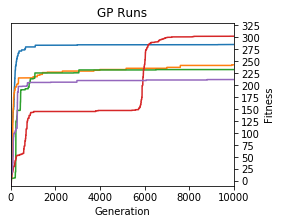

In [3]:
# GP runs

f = plt.figure(figsize=(4,3))
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

for i in range(len(dfs_gp)):
    plt.plot(dfs_gp[i]["fitness_max"].tolist()[:10000], label="Run " + str(i+1))

plt.title("GP Runs")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.ylabel("Fitness")
plt.ylim(-10,330)
plt.yticks(np.arange(0, 331, 25))

plt.savefig("images/evo-gp-runs.pdf", bbox_inches = 'tight')
plt.show()

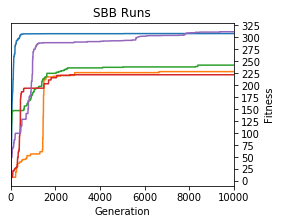

In [4]:
# SBB runs

f = plt.figure(figsize=(4,3))
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

for i in range(len(dfs_sbb)):
    plt.plot(dfs_sbb[i]["fitness_max"].tolist()[:10000], label="Run " + str(i+1))


plt.title("SBB Runs")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.ylabel("Fitness")
plt.ylim(-10,330)
plt.yticks(np.arange(0, 331, 25))

plt.savefig("images/evo-sbb-runs.pdf", bbox_inches = 'tight')
plt.show()

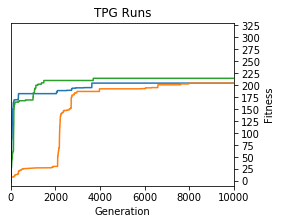

In [5]:
# TPG runs

f = plt.figure(figsize=(4,3))
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

for i in range(len(dfs_tpg)):
    plt.plot(dfs_tpg[i]["fitness_max"].tolist()[:10000], label="Run " + str(i+1))


plt.title("TPG Runs")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.ylabel("Fitness")
plt.ylim(-10,330)
plt.yticks(np.arange(0, 331, 25))

plt.savefig("images/evo-tpg-runs.pdf", bbox_inches = 'tight')
plt.show()

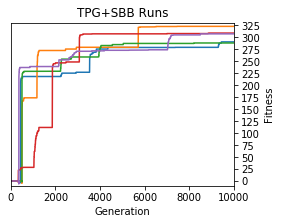

In [6]:
# TPGSBB runs

f = plt.figure(figsize=(4,3))
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

for i in range(len(dfs_tpgsbb)):
    plt.plot(dfs_tpgsbb[i]["fitness_max"].tolist()[:10000], label="Run " + str(i+1))


plt.title("TPG+SBB Runs")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.ylabel("Fitness")
plt.ylim(-10,330)
plt.yticks(np.arange(0, 331, 25))

plt.savefig("images/evo-tpgsbb-runs.pdf", bbox_inches = 'tight')
plt.show()

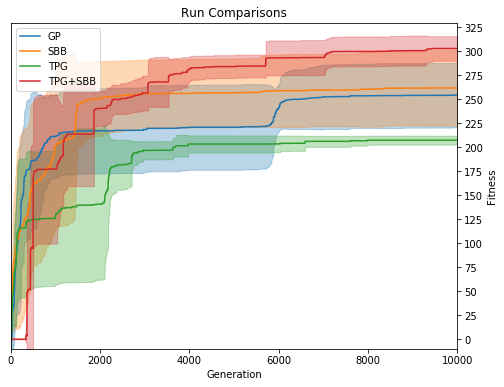

In [7]:
# comparison over average of runs with standard deviations

gp_means, gp_stds = get_mean_std(dfs_gp, "fitness_max", 10000)
sbb_means, sbb_stds = get_mean_std(dfs_sbb, "fitness_max", 10000)
tpg_means, tpg_stds = get_mean_std(dfs_tpg, "fitness_max", 10000)
tpgsbb_means, tpgsbb_stds = get_mean_std(dfs_tpgsbb, "fitness_max", 10000)

f = plt.figure(figsize=(8,6))
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plt.plot(gp_means, label="GP", color=colors[0])
plt.fill_between(range(10000), 
                 gp_means-gp_stds, gp_means+gp_stds,
                alpha=0.3, color=colors[0])

plt.plot(sbb_means, label="SBB", color=colors[1])
plt.fill_between(range(10000), 
                 sbb_means-sbb_stds, sbb_means+sbb_stds,
                alpha=0.3, color=colors[1])

plt.plot(tpg_means, label="TPG", color=colors[2])
plt.fill_between(range(10000), 
                 tpg_means-tpg_stds, tpg_means+tpg_stds,
                alpha=0.3, color=colors[2])

plt.plot(tpgsbb_means, color=colors[3], label="TPG+SBB")
plt.fill_between(range(10000), 
                 tpgsbb_means-tpgsbb_stds, tpgsbb_means+tpgsbb_stds,
                alpha=0.3, color=colors[3])

plt.title("Run Comparisons")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.ylabel("Fitness")
plt.ylim(-10,330)
plt.yticks(np.arange(0, 331, 25))
plt.legend()

plt.savefig("images/evo-runs-compare.pdf", bbox_inches = 'tight')
plt.show()

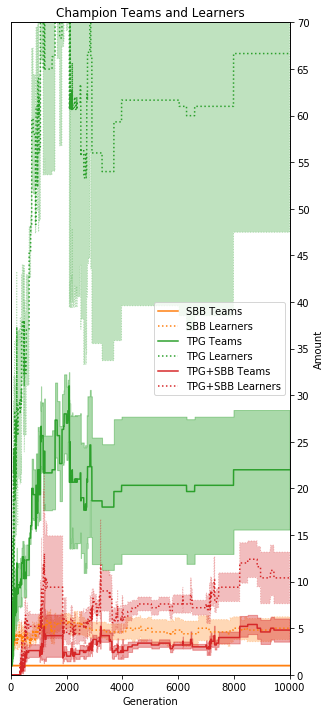

In [8]:
# comparison of champion team and learner sizes

plt.figure(figsize=(5,12))

sbb_teams_means, sbb_teams_stds = get_mean_std(dfs_sbb, "champ_teams", 10000)
sbb_learners_means, sbb_learners_stds = get_mean_std(dfs_sbb, "champ_learners", 10000)

tpg_teams_means, tpg_teams_stds = get_mean_std(dfs_tpg, "champ_teams", 10000)
tpg_learners_means, tpg_learners_stds = get_mean_std(dfs_tpg, "champ_learners", 10000)

tpgsbb_teams_means, tpgsbb_teams_stds = get_mean_std(dfs_tpgsbb, "champ_teams", 10000)
tpgsbb_learners_means, tpgsbb_learners_stds = get_mean_std(dfs_tpgsbb, "champ_learners", 10000)


std_div = 2


plt.plot(sbb_teams_means, color=colors[1], label="SBB Teams")
plt.fill_between(range(10000), 
                 sbb_teams_means-sbb_teams_stds/std_div, sbb_teams_means+sbb_teams_stds/std_div,
                alpha=0.4, color=colors[1])

plt.plot(sbb_learners_means, color=colors[1], linestyle="dotted", label="SBB Learners")
plt.fill_between(range(10000), 
                 sbb_learners_means-sbb_learners_stds/std_div, sbb_learners_means+sbb_learners_stds/std_div,
                alpha=0.3, color=colors[1], linestyle="dotted")



plt.plot(tpg_teams_means, color=colors[2], label="TPG Teams")
plt.fill_between(range(10000), 
                 tpg_teams_means-tpg_teams_stds/std_div, tpg_teams_means+tpg_teams_stds/std_div,
                alpha=0.4, color=colors[2])

plt.plot(tpg_learners_means, color=colors[2], linestyle="dotted", label="TPG Learners")
plt.fill_between(range(10000), 
                 tpg_learners_means-tpg_learners_stds/std_div, tpg_learners_means+tpg_learners_stds/std_div,
                alpha=0.3, color=colors[2], linestyle="dotted")



plt.plot(tpgsbb_teams_means, color=colors[3], label="TPG+SBB Teams")
plt.fill_between(range(10000), 
                 tpgsbb_teams_means-tpgsbb_teams_stds/std_div, tpgsbb_teams_means+tpgsbb_teams_stds/std_div,
                alpha=0.4, color=colors[3])

plt.plot(tpgsbb_learners_means, color=colors[3], linestyle="dotted", label="TPG+SBB Learners")
plt.fill_between(range(10000), 
                 tpgsbb_learners_means-tpgsbb_learners_stds/std_div, tpgsbb_learners_means+tpgsbb_learners_stds/std_div,
                alpha=0.3, color=colors[3], linestyle="dotted")

plt.title("Champion Teams and Learners")
plt.xlabel("Generation")
plt.xlim(0,10000)
#plt.ylabel("Amount")
ylim = plt.ylim(0,70)
plt.yticks(np.arange(-1, 72, 500))
plt.legend()
ax = plt.twinx()
ax.set_ylim(ylim)
ax.set_yticks(np.arange(0, 71, 5))
ax.yaxis.set_label_position("right")
plt.ylabel("Amount")

plt.savefig("images/evo-teams-learners.pdf", bbox_inches = 'tight')
plt.show()

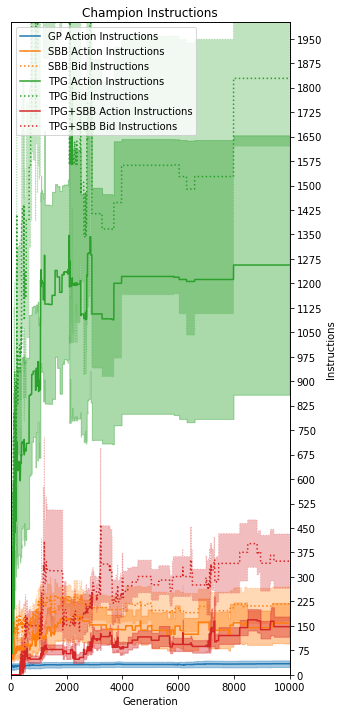

In [9]:
# comparison of champion instruction sizes

plt.figure(figsize=(5,12))

gp_act_means, gp_act_stds = get_mean_std(dfs_gp, "champ_act_instructions", 10000)

sbb_act_means, sbb_act_stds = get_mean_std(dfs_sbb, "champ_act_instructions", 10000)
sbb_bid_means, sbb_bid_stds = get_mean_std(dfs_sbb, "champ_instructions", 10000)

tpg_act_means, tpg_act_stds = get_mean_std(dfs_tpg, "champ_act_instructions", 10000)
tpg_bid_means, tpg_bid_stds = get_mean_std(dfs_tpg, "champ_instructions", 10000)

tpgsbb_act_means, tpgsbb_act_stds = get_mean_std(dfs_tpgsbb, "champ_act_instructions", 10000)
tpgsbb_bid_means, tpgsbb_bid_stds = get_mean_std(dfs_tpgsbb, "champ_instructions", 10000)



std_div = 2


plt.plot(gp_act_means, color=colors[0], label="GP Action Instructions")
plt.fill_between(range(10000), 
                 gp_act_means-gp_act_stds/std_div, gp_act_means+gp_act_stds/std_div,
                alpha=0.4, color=colors[0])



plt.plot(sbb_act_means, color=colors[1], label="SBB Action Instructions")
plt.fill_between(range(10000), 
                 sbb_act_means-sbb_act_stds/std_div, sbb_act_means+sbb_act_stds/std_div,
                alpha=0.4, color=colors[1])

plt.plot(sbb_bid_means, color=colors[1], linestyle="dotted", label="SBB Bid Instructions")
plt.fill_between(range(10000), 
                 sbb_bid_means-sbb_bid_stds/std_div, sbb_bid_means+sbb_bid_stds/std_div,
                alpha=0.3, color=colors[1], linestyle="dotted")



plt.plot(tpg_act_means, color=colors[2], label="TPG Action Instructions")
plt.fill_between(range(10000), 
                 tpg_act_means-tpg_act_stds/std_div, tpg_act_means+tpg_act_stds/std_div,
                alpha=0.4, color=colors[2])

plt.plot(tpg_bid_means, color=colors[2], linestyle="dotted", label="TPG Bid Instructions")
plt.fill_between(range(10000), 
                 tpg_bid_means-tpg_bid_stds/std_div, tpg_bid_means+tpg_bid_stds/std_div,
                alpha=0.3, color=colors[2], linestyle="dotted")





plt.plot(tpgsbb_act_means, color=colors[3], label="TPG+SBB Action Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_act_means-tpgsbb_act_stds/std_div, tpgsbb_act_means+tpgsbb_act_stds/std_div,
                alpha=0.4, color=colors[3])

plt.plot(tpgsbb_bid_means, color=colors[3], linestyle="dotted", label="TPG+SBB Bid Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_bid_means-tpgsbb_bid_stds/std_div, tpgsbb_bid_means+tpgsbb_bid_stds/std_div,
                alpha=0.3, color=colors[3], linestyle="dotted")

plt.title("Champion Instructions")
plt.xlabel("Generation")
plt.xlim(0,10000)
#plt.ylabel("Instructions")
plt.yticks(np.arange(-40, 2001, 5000))
ylim = plt.ylim(0,2000)
plt.legend()

ax = plt.twinx()
ax.set_ylim(ylim)
ax.set_yticks(np.arange(0, 2001, 75))
ax.yaxis.set_label_position("right")
plt.ylabel("Instructions")

plt.savefig("images/evo-instructions.pdf", bbox_inches = 'tight')
plt.show()

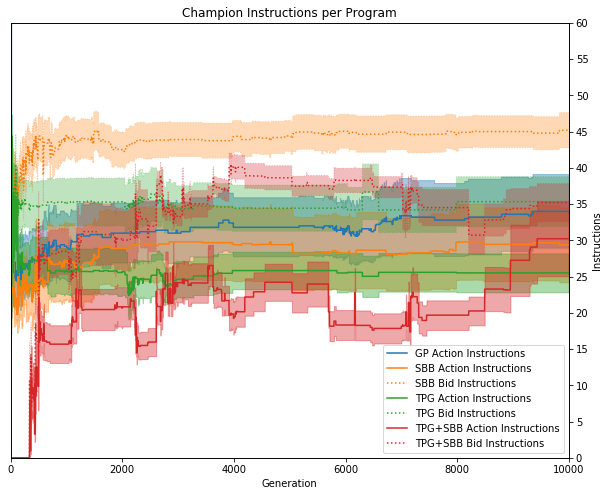

In [10]:
# comparison of champion instruction sizes normalized to learners


plt.figure(figsize=(10,8))

# GP stats
gp_act_means, gp_act_stds = get_mean_std(dfs_gp, "champ_act_instructions", 10000)


# SBB stats

tmp_act_dfs = []
tmp_bid_dfs = []
for df in dfs_sbb:
    tmp_act_dfs.append(pd.DataFrame(
        df["champ_act_instructions"]/df["champ_real_acts"],
        columns=["act"]).fillna(0))
    tmp_bid_dfs.append(pd.DataFrame(
        df["champ_instructions"]/df["champ_learners"],
        columns=["bid"]).fillna(0))
               
sbb_act_means, sbb_act_stds = get_mean_std(tmp_act_dfs, "act", 10000)
sbb_bid_means, sbb_bid_stds = get_mean_std(tmp_bid_dfs, "bid", 10000)


# TPG stats

tmp_act_dfs = []
tmp_bid_dfs = []
for df in dfs_tpg:
    tmp_act_dfs.append(pd.DataFrame(
        df["champ_act_instructions"]/df["champ_real_acts"],
        columns=["act"]).fillna(0))
    tmp_bid_dfs.append(pd.DataFrame(
        df["champ_instructions"]/df["champ_learners"],
        columns=["bid"]).fillna(0))
               
tpg_act_means, tpg_act_stds = get_mean_std(tmp_act_dfs, "act", 10000)
tpg_bid_means, tpg_bid_stds = get_mean_std(tmp_bid_dfs, "bid", 10000)


# TPG+SBB stats

tmp_act_dfs = []
tmp_bid_dfs = []
for df in dfs_tpgsbb:
    tmp_act_dfs.append(pd.DataFrame(
        df["champ_act_instructions"]/df["champ_real_acts"],
        columns=["act"]).fillna(0))
    tmp_bid_dfs.append(pd.DataFrame(
        df["champ_instructions"]/df["champ_learners"],
        columns=["bid"]).fillna(0))
               
tpgsbb_act_means, tpgsbb_act_stds = get_mean_std(tmp_act_dfs, "act", 10000)
tpgsbb_bid_means, tpgsbb_bid_stds = get_mean_std(tmp_bid_dfs, "bid", 10000)


std_div = 4


plt.plot(gp_act_means, color=colors[0], label="GP Action Instructions")
plt.fill_between(range(10000), 
                 gp_act_means-gp_act_stds/std_div, gp_act_means+gp_act_stds/std_div,
                alpha=0.4, color=colors[0])




plt.plot(sbb_act_means, color=colors[1], label="SBB Action Instructions")
plt.fill_between(range(10000), 
                 sbb_act_means-sbb_act_stds/std_div, sbb_act_means+sbb_act_stds/std_div,
                alpha=0.4, color=colors[1])

plt.plot(sbb_bid_means, color=colors[1], linestyle="dotted", label="SBB Bid Instructions")
plt.fill_between(range(10000), 
                 sbb_bid_means-sbb_bid_stds/std_div, sbb_bid_means+sbb_bid_stds/std_div,
                alpha=0.3, color=colors[1], linestyle="dotted")



plt.plot(tpg_act_means, color=colors[2], label="TPG Action Instructions")
plt.fill_between(range(10000), 
                 tpg_act_means-tpg_act_stds/std_div, tpg_act_means+tpg_act_stds/std_div,
                alpha=0.4, color=colors[2])

plt.plot(tpg_bid_means, color=colors[2], linestyle="dotted", label="TPG Bid Instructions")
plt.fill_between(range(10000), 
                 tpg_bid_means-tpg_bid_stds/std_div, tpg_bid_means+tpg_bid_stds/std_div,
                alpha=0.3, color=colors[2], linestyle="dotted")




plt.plot(tpgsbb_act_means, color=colors[3], label="TPG+SBB Action Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_act_means-tpgsbb_act_stds/std_div, tpgsbb_act_means+tpgsbb_act_stds/std_div,
                alpha=0.4, color=colors[3])

plt.plot(tpgsbb_bid_means, color=colors[3], linestyle="dotted", label="TPG+SBB Bid Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_bid_means-tpgsbb_bid_stds/std_div, tpgsbb_bid_means+tpgsbb_bid_stds/std_div,
                alpha=0.3, color=colors[3], linestyle="dotted")

plt.title("Champion Instructions per Program")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.yticks(np.arange(-40, 2001, 5000))
#plt.ylabel("Instructions")
ylim = plt.ylim(-0, 60)
plt.legend()

ax = plt.twinx()
ax.set_ylim(ylim)
ax.set_yticks(np.arange(0, 61, 5))
ax.yaxis.set_label_position("right")
plt.ylabel("Instructions")

plt.savefig("images/evo-instructions-per-program.pdf", bbox_inches = 'tight')
plt.show()

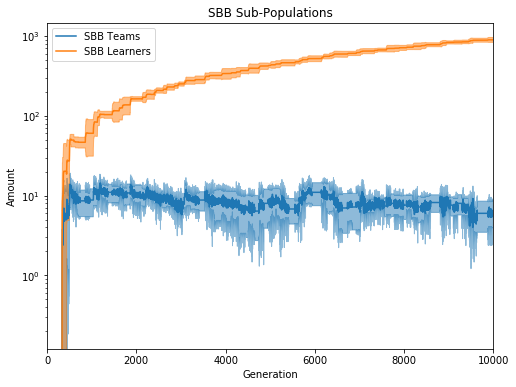

Final SBB Team Portion:  0.017689331122166942
Final SBB Learner Portion:  0.6220614828209765


In [11]:
# visualize sbb pop size over time in tpgsbb


plt.figure(figsize=(8,6))

teams_all_means, teams_all_stds = get_mean_std(dfs_tpgsbb, "b_teams", 10000)
learners_all_means, learners_all_stds = get_mean_std(dfs_tpgsbb, "b_learners", 10000)


plt.plot(teams_all_means, color=colors[0], label="SBB Teams")
plt.fill_between(range(10000), 
                 teams_all_means-teams_all_stds, teams_all_means+teams_all_stds,
                alpha=0.5, color=colors[0])

plt.plot(learners_all_means, color=colors[1], label="SBB Learners")
plt.fill_between(range(10000), 
                 learners_all_means-learners_all_stds, learners_all_means+learners_all_stds,
                alpha=0.5, color=colors[1])

plt.title("SBB Sub-Populations")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.ylabel("Amount")
plt.legend()

plt.yscale("log")
plt.savefig("images/evo-tpgsbb-subpops.pdf", bbox_inches = 'tight')
plt.show()



tpgsbb_teams_all = np.mean(np.array((df_tpgsbb_1["pop_teams"][9999], 
                      df_tpgsbb_2["pop_teams"][9999], 
                      df_tpgsbb_3["pop_teams"][9999], 
                      df_tpgsbb_4["pop_teams"][9999], 
                      df_tpgsbb_5["pop_teams"][9999])))

tpgsbb_learners_all = np.mean(np.array((df_tpgsbb_1["pop_learners"][9999], 
                      df_tpgsbb_2["pop_learners"][9999], 
                      df_tpgsbb_3["pop_learners"][9999], 
                      df_tpgsbb_4["pop_learners"][9999], 
                      df_tpgsbb_5["pop_learners"][9999])))

print("Final SBB Team Portion: ", teams_all_means[9999] / tpgsbb_teams_all)
print("Final SBB Learner Portion: ", learners_all_means[9999] / tpgsbb_learners_all)

In [17]:
df = pd.read_csv("run-data/tpgsbb/4/log-sbb.csv")
df.iloc[27,2]

1.8713261567498376

SBB: 302.70556778612166
TPG: 308.4403397777981


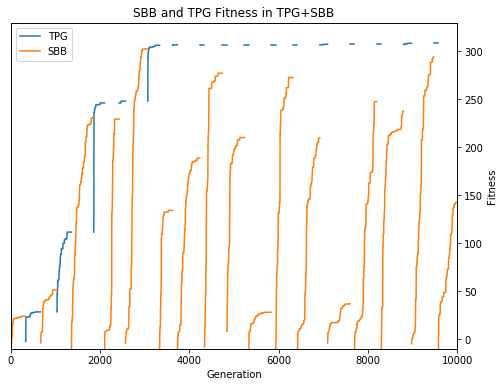

In [28]:
df_tpg = pd.read_csv("run-data/tpgsbb/4/log-tpg.csv")
df_sbb = pd.read_csv("run-data/tpgsbb/4/log-sbb.csv")

tpg_x = []
tpg_y = []
sbb_x = [[]]
sbb_y = [[]]

on_sbb = True
g_old = 0
tpg_i = 0
sbb_i = 0

max_sbb = 0
max_tpg = 0

for g in range(10000):
    if on_sbb:
        sbb_x[-1].append(g)
        sbb_y[-1].append(df_sbb.iloc[sbb_i,2])
        sbb_i += 1
        # switch to reading from tpg up to g_old
        if df_sbb.iloc[sbb_i,0] != g_old:
            on_sbb = False
            tpg_x.append([])
            tpg_y.append([])
            g_old = df_sbb.iloc[sbb_i,0]
            
        if sbb_y[-1][-1] > max_sbb:
            max_sbb = sbb_y[-1][-1]
            
    else:
        tpg_x[-1].append(g)
        tpg_y[-1].append(df_tpg.iloc[tpg_i,3])
        tpg_i += 1
        # switch back to sbb when g_old reached
        if df_tpg.iloc[tpg_i,0] == g_old:
            on_sbb = True
            sbb_x.append([])
            sbb_y.append([])
            
        if tpg_y[-1][-1] > max_tpg:
            max_tpg = tpg_y[-1][-1]
    
    
plt.figure(figsize=(8,6))
    
for i in range(len(tpg_x)):
    if i == 0:
        plt.plot(tpg_x[i], tpg_y[i], color=colors[0], label="TPG")
    else:
        plt.plot(tpg_x[i], tpg_y[i], color=colors[0])

for i in range(len(sbb_x)):
    if i == 0:
        plt.plot(sbb_x[i], sbb_y[i], color=colors[1], label="SBB")
    else:
        plt.plot(sbb_x[i], sbb_y[i], color=colors[1])
    
plt.title("SBB and TPG Fitness in TPG+SBB")
plt.xlabel("Generation")
plt.xlim(0,10000)
plt.yticks(np.arange(-40, 2001, 5000))
ylim = plt.ylim(-10, 330)
plt.legend()

ax = plt.twinx()
ax.set_ylim(ylim)
#ax.set_yticks(np.arange(0, 61, 5))
ax.yaxis.set_label_position("right")
plt.ylabel("Fitness")

plt.savefig("images/evo-tpgsbb-fit.pdf", bbox_inches = 'tight')
    
print("SBB:", max_sbb)
print("TPG:", max_tpg)
    
plt.show()